# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/anu0510/TMDL-23-24/main/tmdb_5000_movies%20TMDL%202024.csv')

View information about the dataset including datatypes and null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

The columns for homepage and tagline have missing values. Missing values can be estimated by imputation.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [11]:
df = df[['title', 'overview', 'genres']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [13]:
df = df.dropna()
df = df.reset_index(drop = True)
df.head()

,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [16]:
import numpy as np
import pandas as pd

np.random.seed(0)

def process_genre_string(gs):
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs)
    return genre

def encode_labels(label, unique_labels):
    out = np.zeros(len(unique_labels))
    out[list(unique_labels).index(label)] = 1
    return out

df['proc_genres'] = df['genres'].apply(process_genre_string)

unique_genres = sorted(list(set(df['proc_genres'])))

df['one_hot_genres'] = df['proc_genres'].apply(lambda x: encode_labels(x, unique_genres))


Verify that one-hot encodings are indeed as expected

In [17]:
df.head()

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55


### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

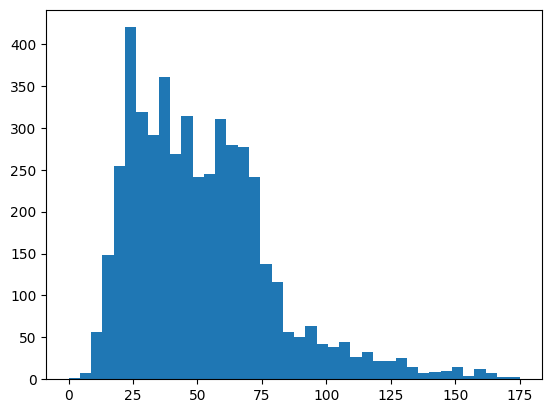

In [18]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column

df["proc_overview"] = df['overview'].apply(lambda x: remove_punctuation(x.lower()).split())

# get the word lengths of each overview and store it in a list
overview_lens = df['overview'].apply(lambda x: len(str(x).split())).tolist()



# for the sake of simplicity, add these values as a column to the df
df['overview_len'] = df['proc_overview'].apply(lambda x: len(x))
plt.hist(df['overview_len'], bins = 'auto')
plt.show()


**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

Shortest is 0, longest is 175. Would maybe pick 25 words as the length so 85% of the data is still retained.

In [29]:
df['overview_len'].min()
df['overview_len'].max()
print(df['overview_len'].quantile(0.15  ))



25.0


### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [30]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df['overview_len'] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df['proc_overview'] = df['proc_overview'].apply(lambda x: x[:token_len])
df.head()
# print to verify

<ipython-input-30-7c044ffb7bbe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proc_overview'] = df['proc_overview'].apply(lambda x: x[:token_len])


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [38]:
# hint: store all words for all movies in a set, change it to a list and sort

unique_words = set()

for overview in df['overview']:
    unique_words.update(str(overview).lower().split())

vocab_len = len(sorted(list(unique_words)))
print(vocab_len)

34180


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [41]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"]:
        sentence_encode.append(...) # get encoding for this word
    sentence_encode = ... # sum over axis=1
    encoded_labels.append(...)

def encode_overview(overview, vocab):
    encoded = np.zeros(len(vocab))
    vocab_list = sorted(list(unique_words))
    for word in overview:
        if word in vocab:
            encoded[vocab_list.index(word)] += 1 #did this because set has no indices, and i was getting an error
    return encoded


df["one_hot_overview"] = df['proc_overview'].apply(lambda x: encode_overview(x, unique_words))
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:00<00:00, 12302.83it/s]
<ipython-input-41-32e579b2fd49>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["one_hot_overview"] = df['proc_overview'].apply(lambda x: encode_overview(x, unique_words))


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

12493 x 4707 X 16

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

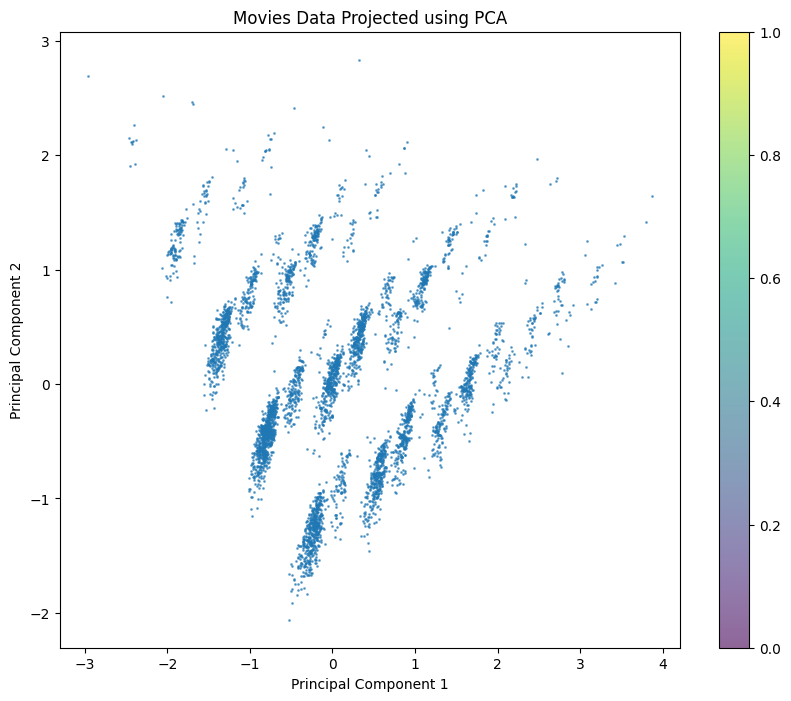

In [42]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

x_pca = pca.fit_transform(np.vstack(df['one_hot_overview'].apply(np.array)))

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.6, s=1)
plt.colorbar()
plt.title('Movies Data Projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# Using lecture

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

The movies look like they have formed some clusters.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [43]:
print(pca.explained_variance_ratio_)

[0.07262855 0.04462646]


**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

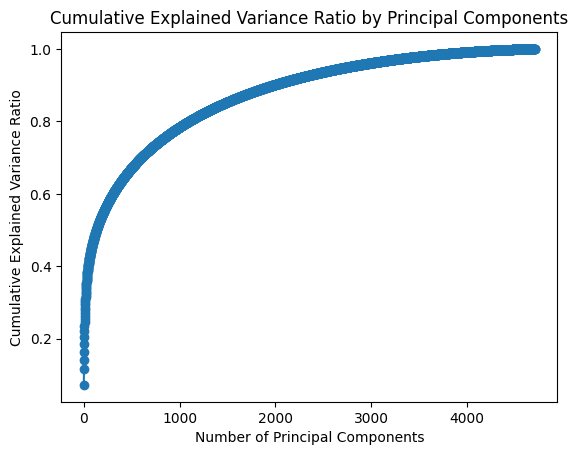

In [46]:
# Set up PCA object with the desired number of components
pca = PCA(n_components=4707)

# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(np.vstack(df['one_hot_overview'].apply(np.array)))

# get explained variance ratio from object, store it in a list
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# set up y label, x label, title
plt.plot(cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [47]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.8) + 1

print(n_components)


1097


1097 PCA's are required

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [49]:

n_dims = 1097
pca = PCA(n_components=1097)
labels_pca = pca.fit(np.vstack(df['one_hot_overview'].apply(np.array)))
pca_col = pca.transform(np.vstack(df['one_hot_overview'].apply(np.array)))

df["overview_pca"] = pca_col.tolist()

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [51]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(pca_col)

df['cluster_kmeans'] = kmeans.predict(pca_col)

#cluster 0
cluster0 = df[df['cluster_kmeans'] == 0]

for title in cluster0['title']:
  print(title)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Alice in Wonderland
The Great Gatsby
The Good Dinosaur
Iron Man
The Polar Express
Stealth
Noah
Australia
Dinosaur
Planet of the Apes
Blood Diamond
Catwoman
Treasure Planet
Son of the Mask
Black Hawk Down
Finding Nemo
The Interpreter
102 Dalmatians
Flubber
The Day the Earth Stood Still
Now You See Me
Unbreakable
Die Hard 2
Star Trek: Insurrection
The Score
This Means War
3000 Miles to Graceland
2 Guns
Jack Reacher
Under Siege 2: Dark Territory
Reign of Fire
Holy Man
The Forbidden Kingdom
The Watch
Muppets Most Wanted
Seven Pounds
From Paris with Love
I Am Number Four
13 Hours: The Secret Soldiers of Benghazi
The International
Escape from L.A.
The One
Rat Race
Happily N'Ever After
Patriot Games
From Hell
Cellular
Nixon
Love in the Time of Cholera
The Sixth Sense
Escape from Planet Earth
The Lake House
8MM
Get Rich or Die Tryin'
Pandorum
The Hunting Party
Because I Said So
Isn't She Great
Black Knight
The Bad News Bears
Mirrors
Thunder and the House of Magic
Phenomenon
Ace Ventura: When N

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

Honestly, I have watched very few movies from this list- but to me, it seems like there may be quite a few movies that definitely don't go together.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

Can't really see an elbow clearly, but I would pick 5 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

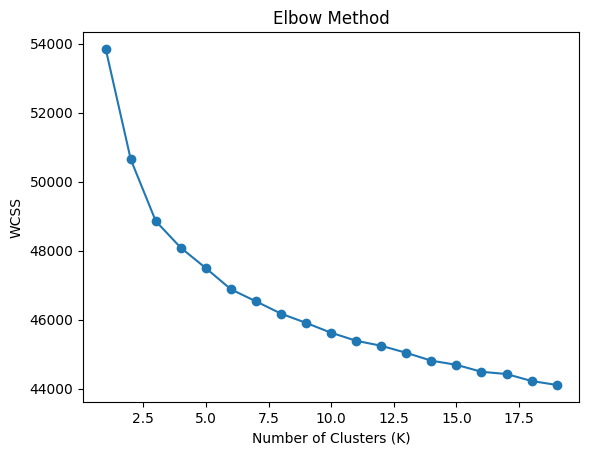

In [52]:
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(pca_col)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, 'o-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [53]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(20)
gmm.fit(pca_col)

df['cluster_gmm'] = gmm.predict(pca_col)

df7 = df[df['cluster_gmm'] == 7]

for title in df7['title']:
  print(title)

John Carter
Titanic
X-Men: The Last Stand
Oz: The Great and Powerful
The Jungle Book
The Polar Express
The Sorcerer's Apprentice
X-Men Origins: Wolverine
Beowulf
Final Fantasy: The Spirits Within
Happy Feet Two
The 13th Warrior
Dante's Peak
Tomorrow Never Dies
The Aviator
Casino Royale
Rise of the Planet of the Apes
Cutthroat Island
A.I. Artificial Intelligence
Tower Heist
Deep Impact
Space Jam
Timeline
Titan A.E.
Doctor Dolittle
Hook
AVP: Alien vs. Predator
The Legend of Hercules
Proof of Life
Elektra
The Happening
ParaNorman
The Jackal
Jack Ryan: Shadow Recruit
London Has Fallen
Righteous Kill
The Last Castle
In the Name of the King: A Dungeon Siege Tale
Hitch
Gigli
Lucky You
Barnyard
The Adjustment Bureau
Silent Hill
The Replacements
American Reunion
Gremlins 2: The New Batch
Man of the House
Out of Sight
Insomnia
Tin Cup
Revolutionary Road
The Phantom
Rambo: First Blood Part II
Cheaper by the Dozen
Scream 3
I Love You, Man
Get Him to the Greek
Mickey Blue Eyes
Drillbit Taylor
A Mil

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

This clustering seems to have more comedy movies grouped together, so it seems like it may be better.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

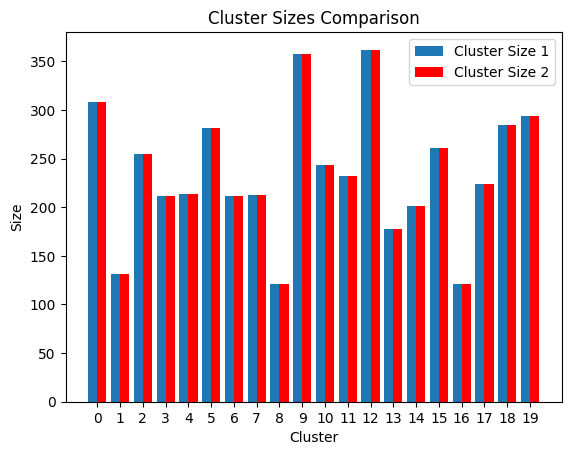

In [54]:
# Create an array for the x-axis positions
cluster_sizes = df['cluster_gmm'].value_counts().sort_index()
x_positions = np.arange(len(cluster_sizes))

# Plotting the bars
plt.bar(x_positions - 0.2, cluster_sizes, width=0.4, label='Cluster Size 1')
plt.bar(x_positions + 0.2, cluster_sizes, width=0.4, label='Cluster Size 2', color='r')

# Add labels, title, and legend
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Sizes Comparison')
plt.xticks(x_positions, cluster_sizes.index)
plt.legend()

plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

Not sure if they are supposed to be the same, but they seem to be the same...

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [55]:
cluster_kmeans = df.loc[df['title'] == 'Avatar', 'cluster_kmeans'].iloc[0]
cluster_gmm = df.loc[df['title'] == 'Avatar', 'cluster_gmm'].iloc[0]
recommendations = df[(df['cluster_kmeans'] == cluster_kmeans) & (df['cluster_gmm'] == cluster_gmm) & (df['title'] != 'Avatar')]

for title in recommendations['title']:
    print(title)

Brave
Charlie and the Chocolate Factory
The Matrix Reloaded
How the Grinch Stole Christmas
Real Steel
Starship Troopers
Dredd
The Pink Panther
Six Days Seven Nights
Battlefield Earth
The Sentinel
Event Horizon
The Phantom of the Opera
Johnny English
Johnny English Reborn
Spy Kids 3-D: Game Over
City Hall
Nomad: The Warrior
The Thing
Blast from the Past
Moonraker
The Cabin in the Woods
North Country
Lucky Number Slevin
The Newton Boys
Undercover Brother
The Conspirator
The 33
A Turtle's Tale: Sammy's Adventures
Gandhi
I Heart Huckabees
Black Book
Zambezia
Adaptation.
Catch-22
Why Did I Get Married?
The Deer Hunter
The Son of No One
Poetic Justice
An American Haunting
Black Swan
The Godfather: Part II
The Widow of Saint-Pierre
The Vatican Tapes
The Fourth Kind
Gunless
Kites
Detention
Sicko
Barbarella
The Inkwell
Warlock
A Single Man
The Mighty Macs
March or Die
Two Lovers and a Bear
The Chumscrubber
The Terminator
Sling Blade
Salvador
Topaz
Among Giants
Please Give
Blazing Saddles
Conque

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

The second recommender system does seem to be somewhat decent, a few could definitely be recommended from that list.

**Q6.3** How would you try making the recommender systems better?

I would maybe start by also incorporating genres into the recommendation systems.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

We could use supervised ML to match the movie to its 'nearest' neighbours.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [56]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2)/np.sqrt(np.dot(v1,v1) * np.dot(v2,v2))

# get overview_pca encoding of previously watched film
prev_watch_enc = df['overview_pca'][0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(row['overview_pca'], prev_watch_enc))

df['cos_sim_to_avatar'] = sims
df = df.sort_values(by = 'cos_sim_to_avatar', ascending=False)
df.head(10)

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1712670985947032, 1.2546267589937186, 1.063...",19,10,1.000000
3363,Warlock,A warlock flees from the 17th to the 20th cent...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[a, warlock, flees, from, the, 17th, to, the, ...",122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14278090137082344, 1.1936958532664244, 1.00...",19,10,0.528211
1285,Nomad: The Warrior,The Nomad is a historical epic set in 18th-cen...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 36, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[the, nomad, is, a, historical, epic, set, in,...",39,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2500981527782346, 1.4183868233855157, 0.330...",19,10,0.473406
3778,Zipper,Sam Ellis is a man on the rise — a hot-shot fe...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[sam, ellis, is, a, man, on, the, rise, a, hot...",48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2149386308828097, 1.408653141286272, 0.5148...",18,10,0.460265
415,Dredd,"In the future, America is a dystopian wastelan...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, future, america, is, a, dystopian, w...",87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23144201595240874, 1.4012512383390772, 0.35...",19,10,0.455290
277,Casino Royale,"Le Chiffre, a banker to the world's terrorists...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[le, chiffre, a, banker, to, the, worlds, terr...",77,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6768541887645131, 0.6592546041642654, 1.56...",12,7,0.445864
2935,Barry Lyndon,"In the Eighteenth Century, in a small village ...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[in, the, eighteenth, century, in, a, small, v...",69,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.4857319022079686, 1.182476958317463, -0.20...",17,19,0.439559
4407,Frat Party,Duffy the big man on campus who is marrying Ad...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Romance,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[duffy, the, big, man, on, campus, who, is, ma...",67,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6576370294653008, 0.8492788235341582, 1.03...",12,7,0.410370
634,The Matrix,"Set in the 22nd century, The Matrix tells the ...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[set, in, the, 22nd, century, the, matrix, tel...",32,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.94976253710553, 1.4522104481169447, 0.13172...",10,12,0.404459
557,Jarhead,Jarhead is a film about a US Marine Anthony Sw...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10752, ""n...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[jarhead, is, a, film, about, a, us, marine, a...",72,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.4840349540067029, 1.0394937350047535, 0.08...",17,19,0.402256


*Your text answer here*

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [ ]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming 'X' as the pre-processed numerical representation of the overviews exists in df
# For example, if it's a one-hot encoded representation of words or any numerical feature set derived from 'overview'

# Encoding genres for the whole dataset before splitting (to ensure consistency)
label_encoder = LabelEncoder()
df['encoded_genre'] = label_encoder.fit_transform(df['genre'])

# Separate the feature set and labels for training and test sets
X_train = np.array(df_train['X'].tolist())  # Assuming 'X' is a column with numerical representations
y_train = df_train['encoded_genre'].values

X_test = np.array(df_test['X'].tolist())
y_test = df_test['encoded_genre'].values

# Clustering with K-means on the training data
n_clusters = len(np.unique(y_train))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Assigning clusters to training and test data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Mapping each cluster to a genre based on majority voting within the training set cluster
cluster_to_genre = {}
for cluster in range(n_clusters):
    indices = np.where(train_clusters == cluster)[0]
    if len(indices) > 0:
        most_common_genre = df_train.iloc[indices]['encoded_genre'].mode()[0]
        cluster_to_genre[cluster] = most_common_genre
    else:
        cluster_to_genre[cluster] = np.random.choice(df_train['encoded_genre'])  # Fallback

# Predicting genres for training and test sets
y_train_pred = np.array([cluster_to_genre[cluster] for cluster in train_clusters])
y_test_pred = np.array([cluster_to_genre[cluster] for cluster in test_clusters])

# Evaluating
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*Your text answer here*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)